# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), (x_img_test, y_label_test)=cifar100.load_data()
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [3]:
# 查詢檔案維度資訊
print(x_img_train.shape)
print(y_label_train.shape)
print(x_img_test.shape)
print(y_label_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
#針對物件圖像數據集的類別編列成字典

label_dict={0:"beaver",1:"dolphin",2:"otter",3:"seal",4:"whale",
            5:"aquarium fish",6:"flatfish",7:"ray",8:"shark",9:"trout",
            10:"orchids", 11:"poppies", 12:"roses", 13:"sunflowers", 14:"tulips", 
            15:"bottles", 16:"bowls", 17:"cans", 18:"cups", 19:"plates",
            20:"apples", 21:"mushrooms", 22:"oranges", 23:"pears", 24:"sweet peppers",
            25:"clock", 26:"computer keyboard", 27:"lamp", 28:"telephone", 29:"television",
            30:"bed", 31:"chair", 32:"couch", 33:"table", 34:"wardrobe",
            35:"bee", 36:"beetle", 37:"butterfly", 38:"caterpillar", 39:"cockroach",
            40:"bear", 41:"leopard", 42:"lion", 43:"tiger", 44:"wolf",
            45:"bridge", 46:"castle", 47:"house", 48:"road", 49:"skyscraper",
            50:"cloud", 51:"forest", 52:"mountain", 53:"plain", 54:"sea",
            55:"camel", 56:"cattle", 57:"chimpanzee", 58:"elephant", 59:"kangaroo",
            60:"fox", 61:"porcupine", 62:"possum", 63:"raccoon", 64:"skunk",
            65:"crab", 66:"lobster", 67:"snail", 68:"spider", 69:"worm",
            70:"baby", 71:"boy", 72:"girl", 73:"man", 74:"woman",
            75:"crocodile", 76:"dinosaur", 77:"lizard", 78:"snake", 79:"turtle",
            80:"hamster", 81:"mouse", 82:"rabbit", 83:"shrew", 84:"squirrel",
            85:"maple", 86:"oak", 87:"palm", 88:"pine", 89:"willow",
            90:"bicycle", 91:"bus", 92:"motorcycle", 93:"pickup truck", 94:"train",
            95:"lawn-mower", 96:"rocket", 97:"streetcar", 98:"tank", 99:"tractor",}

In [5]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

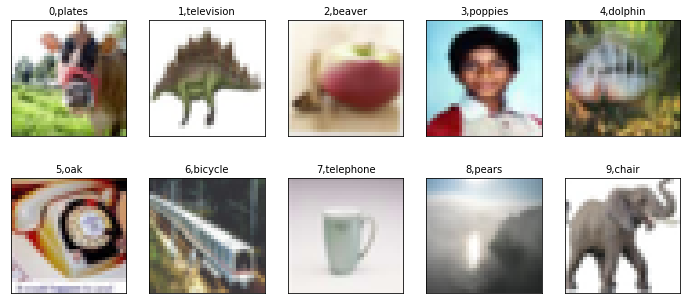

In [6]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [7]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [8]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [9]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [10]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [11]:
y_label_train.shape

(50000, 1)

In [12]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [13]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [14]:
y_label_train_OneHot.shape

(50000, 100)

In [15]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.